In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

from tensorflow.keras.utils import to_categorical


In [74]:
df = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')
df.head(20)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df.shape

(60000, 785)

In [76]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [77]:
df["label"].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [79]:
df.isnull().sum().sum()

np.int64(0)

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
X_train = df.drop('label', axis=1).values
y_train = df['label'].values
X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values
y_test


array([7, 2, 1, ..., 4, 5, 6])

In [82]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [83]:
X_train_img = X_train.reshape(-1,28,28)
X_test_img = X_test.reshape(-1,28,28)

In [84]:
X_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [85]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [86]:
y_train


array([5, 0, 4, ..., 5, 6, 8])

### Perceptron model

In [87]:
perceptron  = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation="softmax")
])

In [88]:
perceptron.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["accuracy"])

In [89]:
history = perceptron.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8169 - loss: 0.7743 - val_accuracy: 0.8800 - val_loss: 0.4814
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8805 - loss: 0.4566 - val_accuracy: 0.8967 - val_loss: 0.4001
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8911 - loss: 0.4036 - val_accuracy: 0.9030 - val_loss: 0.3676
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8970 - loss: 0.3770 - val_accuracy: 0.9070 - val_loss: 0.3487
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9007 - loss: 0.3602 - val_accuracy: 0.9092 - val_loss: 0.3358


In [90]:
accu_perceptron = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [91]:
accu_perceptron

0.9092000126838684

### ANN model

In [92]:
ann_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [93]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
history_ann =ann_model.fit(X_train_img, y_train_cat,epochs=10, batch_size=32 , validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9289 - loss: 0.2405 - val_accuracy: 0.9601 - val_loss: 0.1252
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9687 - loss: 0.1031 - val_accuracy: 0.9669 - val_loss: 0.1037
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9775 - loss: 0.0715 - val_accuracy: 0.9743 - val_loss: 0.0815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9821 - loss: 0.0551 - val_accuracy: 0.9741 - val_loss: 0.0878
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9861 - loss: 0.0425 - val_accuracy: 0.9760 - val_loss: 0.0830
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9888 - loss: 0.0345 - val_accuracy: 0.9808 - val_loss: 0.0709
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9788 - val_loss: 0.0766
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9919 - loss: 0.02

In [95]:
accu_ann_model = ann_model.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [96]:
accu_ann_model

0.978600025177002

### CNN model

In [97]:
X_train_cnn = X_train.reshape(-1, 28,28, 1)
X_test_cnn = X_test.reshape(-1, 28,28, 1)


In [98]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [99]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
history_cnn = cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_cnn,y_test_cat), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.9368 - loss: 0.2086 - val_accuracy: 0.9862 - val_loss: 0.0445
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9765 - loss: 0.0778 - val_accuracy: 0.9884 - val_loss: 0.0341
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9832 - loss: 0.0552 - val_accuracy: 0.9921 - val_loss: 0.0265
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9858 - loss: 0.0462 - val_accuracy: 0.9909 - val_loss: 0.0275
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9881 - loss: 0.0390 - val_accuracy: 0.9918 - val_loss: 0.0246
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9898 - loss: 0.0328 - val_accuracy: 0.9912 - val_loss: 0.0281
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.9917 - val_loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9926 -

In [112]:
accu_cnn_model = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
accu_cnn_model

0.9918000102043152

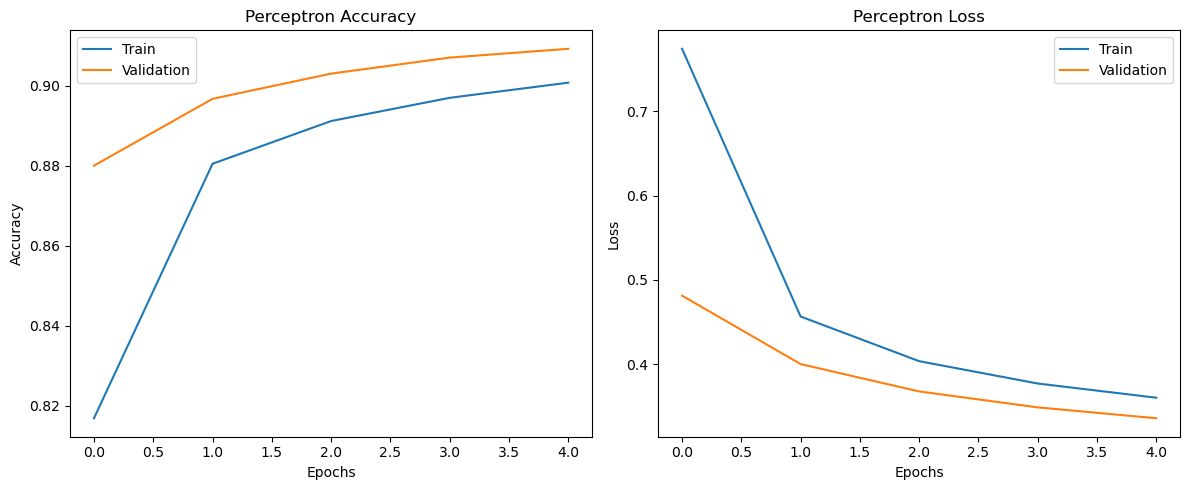

In [102]:
plt.figure(figsize=(12,5))

# ---- Accuracy subplot ----
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Perceptron Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

# ---- Loss subplot ----
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Perceptron Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

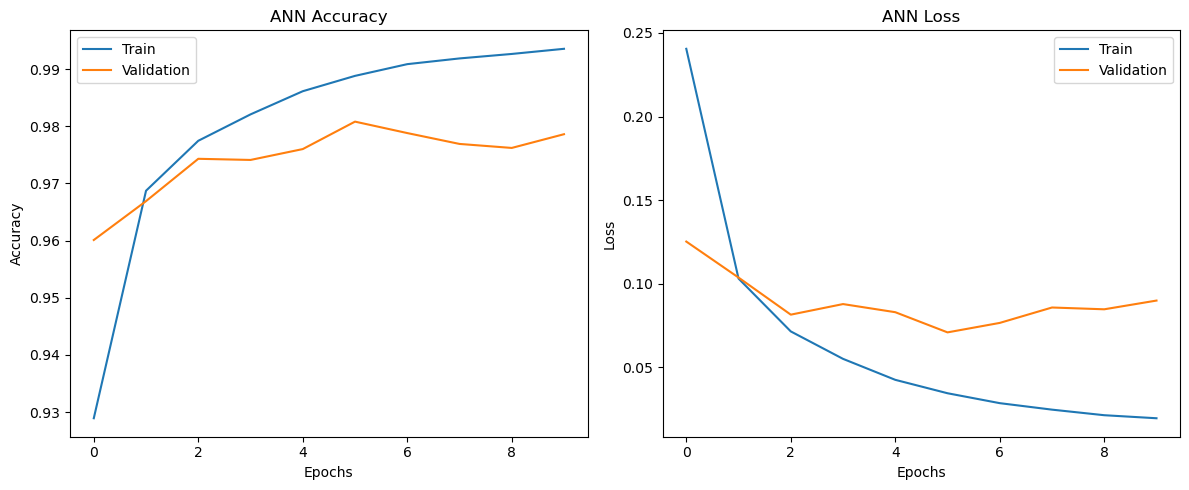

In [103]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title("ANN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

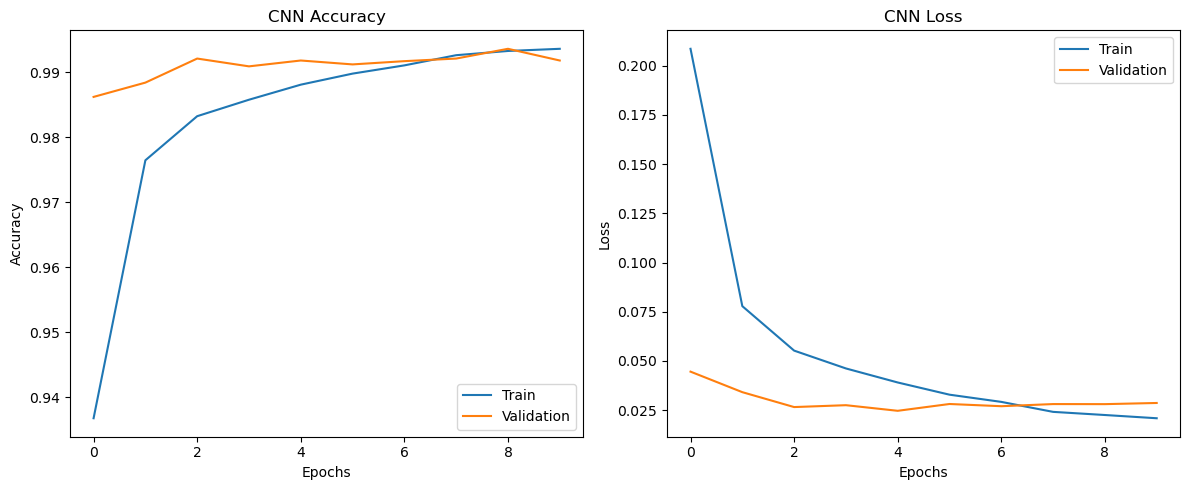

In [104]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

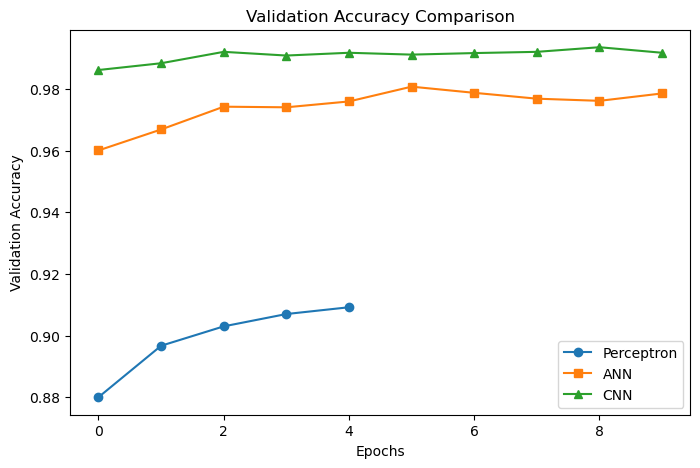

In [106]:
plt.figure(figsize=(8,5))

plt.plot(history.history['val_accuracy'], marker='o')
plt.plot(history_ann.history['val_accuracy'], marker='s')
plt.plot(history_cnn.history['val_accuracy'], marker='^')

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend(["Perceptron", "ANN", "CNN"])
plt.grid(False)
plt.show()

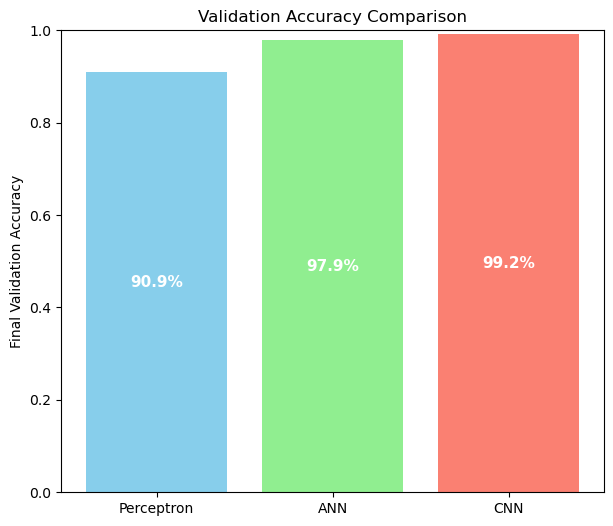

In [ ]:
final_val_acc = [
    history.history['val_accuracy'][-1],
    history_ann.history['val_accuracy'][-1],
    history_cnn.history['val_accuracy'][-1]
]

models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(7,6))
bars = plt.bar(models, final_val_acc, color=['skyblue','lightgreen','salmon'])
plt.ylim(0,1)
plt.ylabel("Final Validation Accuracy")
plt.title("Validation Accuracy Comparison")

for bar, acc in zip(bars, final_val_acc):
    plt.text(
        bar.get_x() + bar.get_width()/2,   # x position (center)
        bar.get_height()/2,                # y position (middle of bar)
        f"{acc*100:.1f}%",                # show as percentage
        ha='center', va='center',          # align center
        color='white', fontsize=11, fontweight='bold'
    )

plt.show()

In [114]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


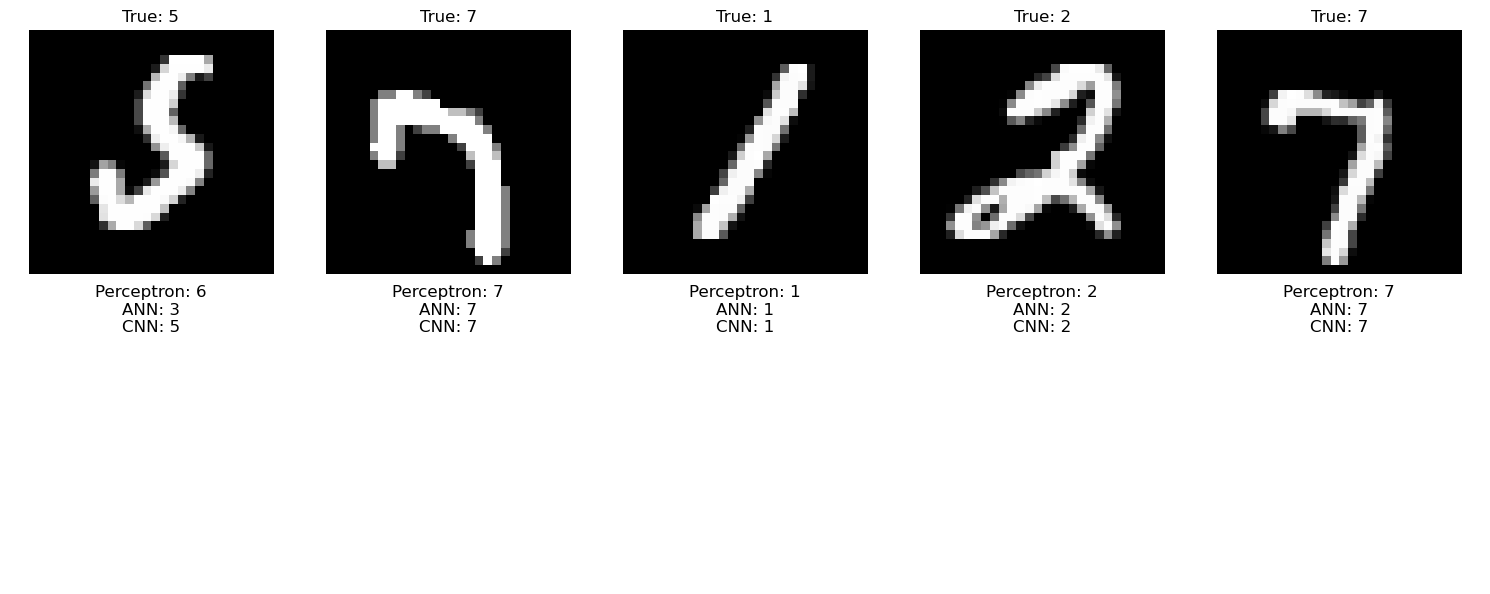

In [119]:
show_side_by_side([perceptron, ann_model, cnn_model], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)

In [120]:
cnn_model.save('cnn_model.h5')
ann_model.save('ann_model.h5')
perceptron.save('perceptron_model.h5')